This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for Germany

#  Setting the directory and reading the data

In [1]:
# Setting the directory

import os
import pandas as pd
import numpy as np

DATAPATH = "C:/Users/Ozan/Desktop/learning/Python_programming/projects/youtube_stat"
os.chdir(DATAPATH)

In [2]:
# Reading the data
#ISO-8859-1
import glob
import json
filename_json = "DE_category_id.json"

df = pd.read_csv('DEvideos.csv', encoding = "utf-8")

In [3]:
# Inspect the data, checking possible missing values
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
video_id                  40840 non-null object
trending_date             40840 non-null object
title                     40840 non-null object
channel_title             40840 non-null object
category_id               40840 non-null int64
publish_time              40840 non-null object
tags                      40840 non-null object
views                     40840 non-null int64
likes                     40840 non-null int64
dislikes                  40840 non-null int64
comment_count             40840 non-null int64
thumbnail_link            40840 non-null object
comments_disabled         40840 non-null bool
ratings_disabled          40840 non-null bool
video_error_or_removed    40840 non-null bool
description               39288 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
#Check the null data
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64

We are not interested in 'description' variable, therefore we are good to continue

In [6]:
# Lets add all labels for the "category_id" variable

category_id ={}

with open(filename_json, 'r') as f:
    json_data = json.load(f)
    
for category in json_data['items']:
    category_id[category['id']] = category['snippet']['title']

In [7]:
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
# Adding labels to our dataset and change them to string variable

df['category_id'] = df['category_id'].astype(str)
df.insert(5, 'Category', df['category_id'].map(category_id))

In [9]:
# Look the most popular trend video category in Germany
import matplotlib.pyplot as plt

In [10]:
data = list(df['Category'].value_counts())
labels = list(df['Category'].value_counts().index)

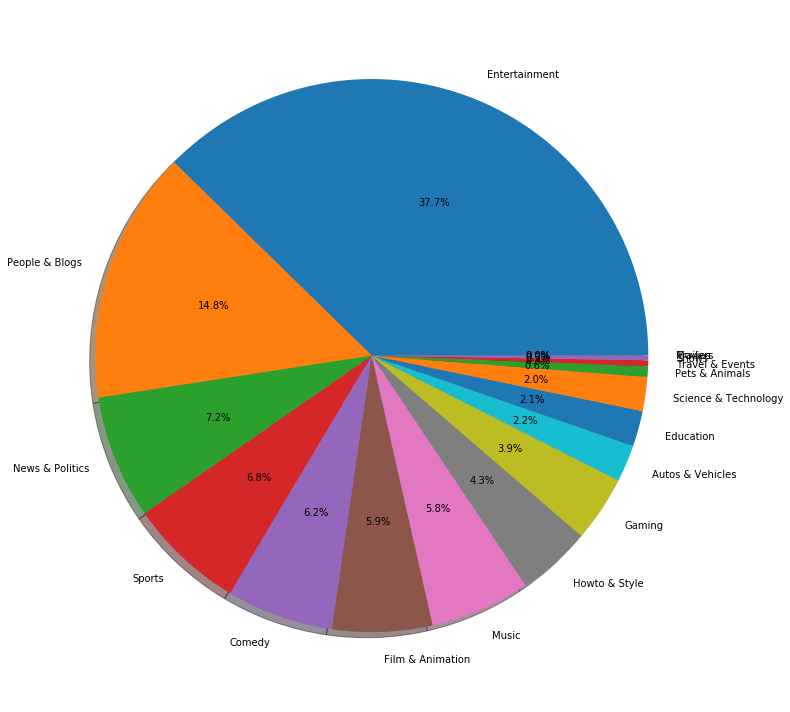

In [11]:
plt.figure(figsize = (10,10))
plt.pie(data,labels = labels, autopct='%1.1f%%', shadow=True)
plt.tight_layout()

In [12]:
df['Category'].value_counts().iloc[:5].index

Index(['Entertainment', 'People & Blogs', 'News & Politics', 'Sports',
       'Comedy'],
      dtype='object')

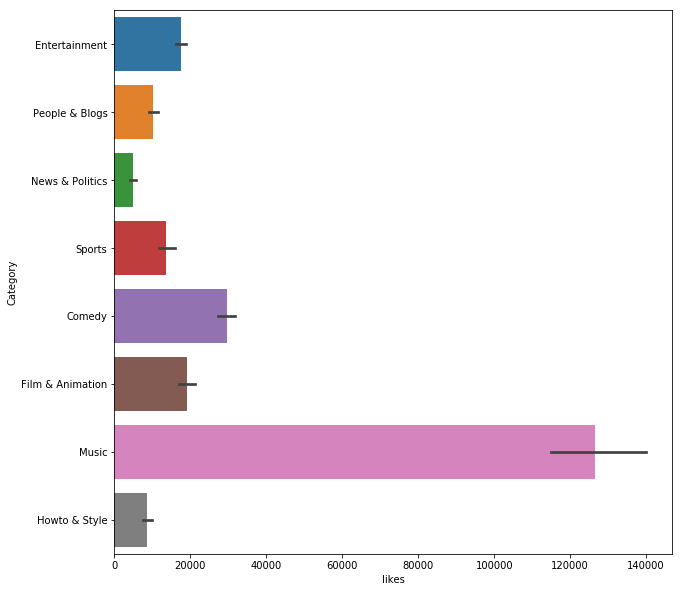

In [13]:
#Looking the category that got the most likes
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)
sns.barplot(x = "likes", y = "Category", data = df, order = df['Category'].value_counts().iloc[:8].index)

Although 'Entertainment' category covers the big portion of trend videos, the 'Music' category get most likes

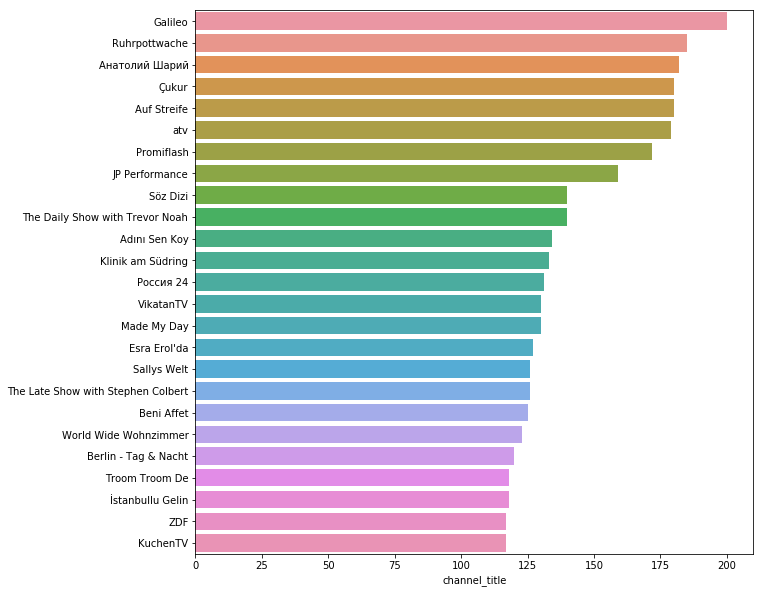

In [14]:
# lets take a look at channels whose videos contains more trend videos

channels_most = df.channel_title.value_counts()[:25]
a = sns.barplot(y=channels_most.index, x=channels_most)

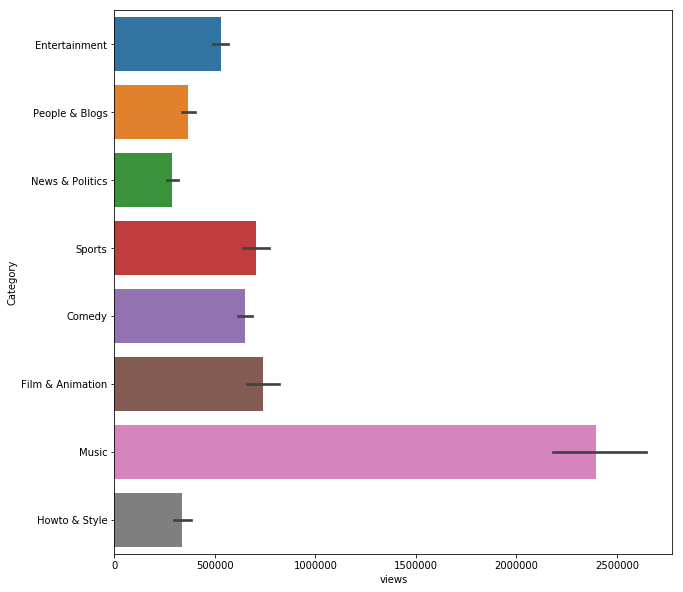

In [15]:
#Videos getting the most attention

sns.barplot(x = "views", y = "Category", data = df, order = df['Category'].value_counts().iloc[:8].index)

Again, the 'Music' category leading the top.

In [16]:
# Creating some new variables which show like/view rate

df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['comment_rate'] =  df ['comment_count'] / df['views'] * 100

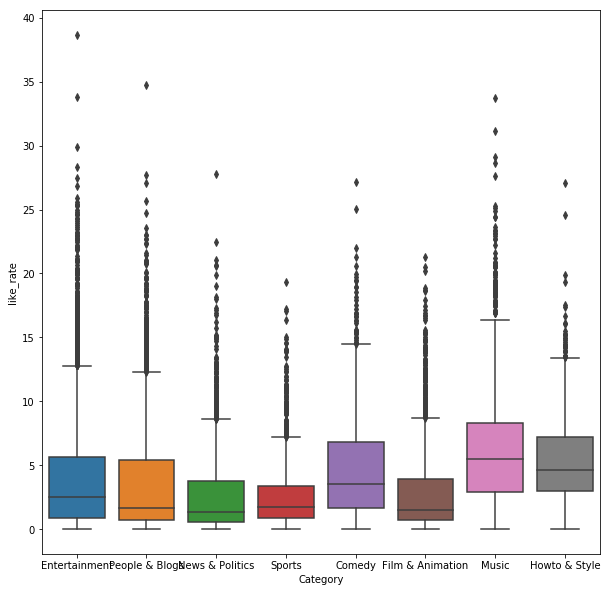

In [17]:
sns.boxplot(x = 'Category' , y = 'like_rate', data = df, order = df['Category'].value_counts().iloc[:8].index)

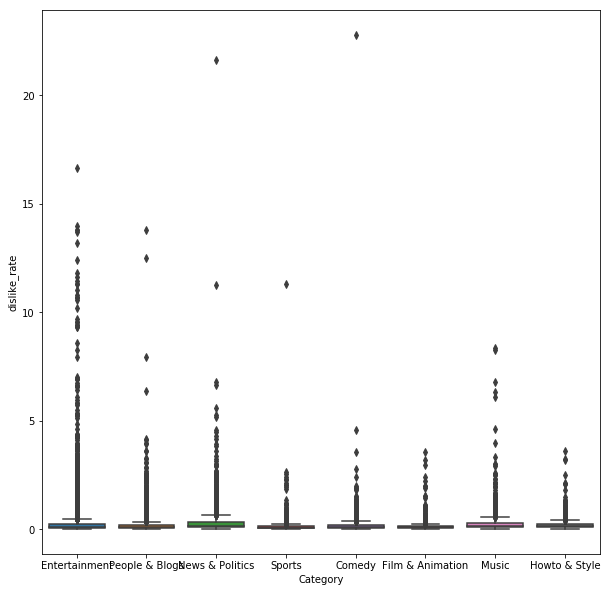

In [18]:
sns.boxplot(x = 'Category' , y = 'dislike_rate', data = df, order = df['Category'].value_counts().iloc[:8].index)

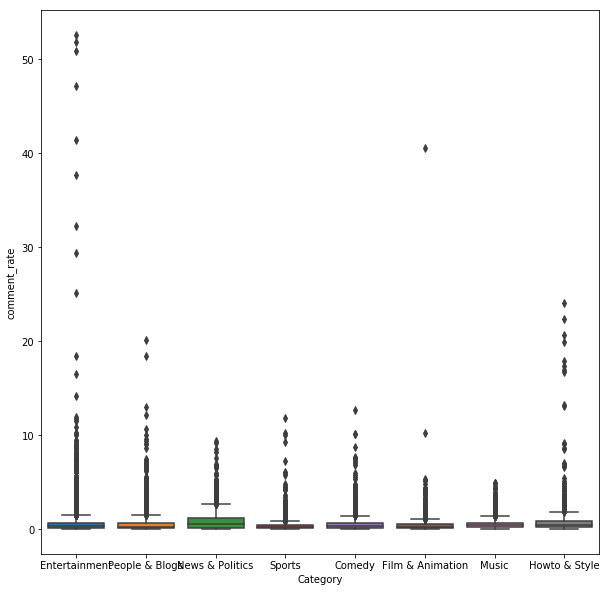

In [19]:
sns.boxplot(x = 'Category' , y = 'comment_rate', data = df, order = df['Category'].value_counts().iloc[:8].index)

In [20]:
# Lets take a look at a possible correlation between variables

corr_matrix = df.corr()

In [21]:
corr_matrix["likes"].sort_values(ascending=False)

likes                     1.000000
comment_count             0.852492
views                     0.824189
dislikes                  0.460208
like_rate                 0.135617
dislike_rate              0.037302
comment_rate              0.027407
video_error_or_removed    0.002520
ratings_disabled         -0.027795
comments_disabled        -0.028049
Name: likes, dtype: float64

C:\Users\Ozan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158CEF2AD30>,
      dtype=object)

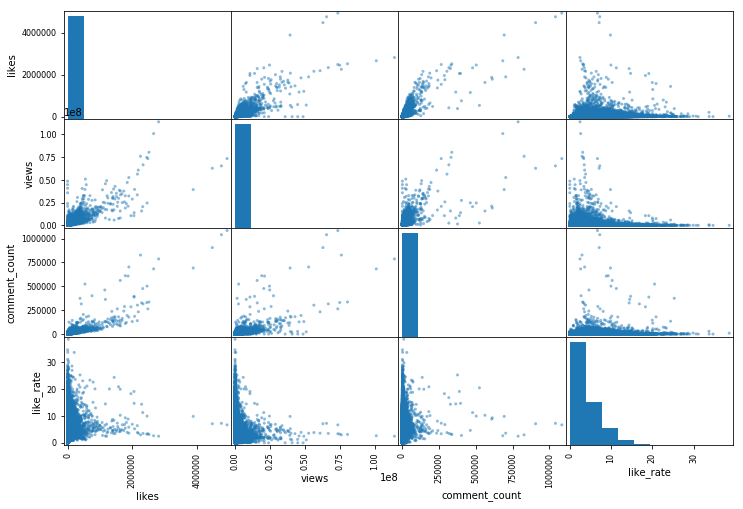

In [22]:
from pandas.tools.plotting import scatter_matrix

attributes = ["likes", "views", "comment_count", "like_rate"]

scatter_matrix(df[attributes], figsize=(12, 8))

In [23]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [24]:
de_tags = ",".join(tags for tags in df['tags'])

In [25]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(de_tags)

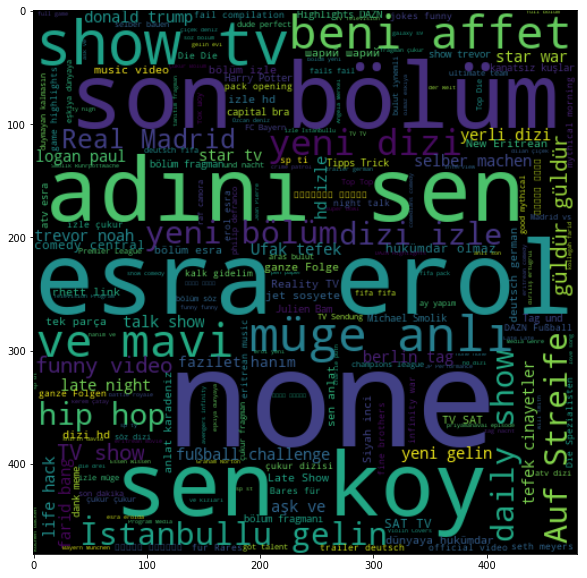

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')

It clearly shows that German/Turkish people are pretty active on Youtube, LOL

In [27]:
mask = np.array(Image.open("deutschland.jpg"))
wordcloud_de = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(de_tags)
image_colors = ImageColorGenerator(mask)

(-0.5, 1023.5, 613.5, -0.5)

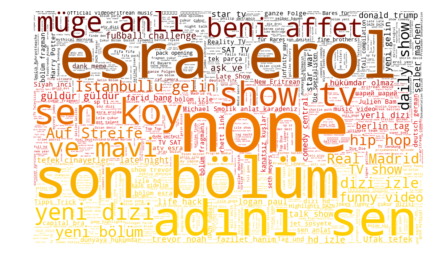

In [28]:
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_de.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

German Flag Version

In [29]:
de_title = ",".join(title for title in df['title'])

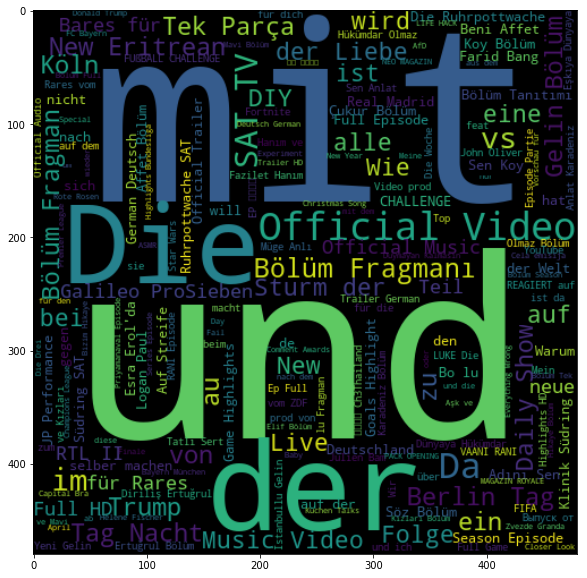

In [30]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(de_title)
plt.imshow(wordcloud, interpolation='bilinear')

As expected, most of titles contain "Artikel" or "Konjunktion".